# vanishing gradient

## sigmoid - gauss

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.07
                : 10. 正答率(テスト) = 0.1135
Generation: 20. 正答率(トレーニング) = 0.12
                : 20. 正答率(テスト) = 0.1009
Generation: 30. 正答率(トレーニング) = 0.1
                : 30. 正答率(テスト) = 0.1135
Generation: 40. 正答率(トレーニング) = 0.1
                : 40. 正答率(テスト) = 0.1135
Generation: 50. 正答率(トレーニング) = 0.1
                : 50. 正答率(テスト) = 0.1135
Generation: 60. 正答率(トレーニング) = 0.13
                : 60. 正答率(テスト) = 0.1135
Generation: 70. 正答率(トレーニング) = 0.11
                : 70. 正答率(テスト) = 0.1135
Generation: 80. 正答率(トレーニング) = 0.06
                : 80. 正答率(テスト) = 0.1135
Generation: 90. 正答率(トレーニング) = 0.19
                : 90. 正答率(テスト) = 0.1135
Generation: 100. 正答率(トレーニング) = 0.15
                : 100. 正答率(テスト) = 0.1135
Generation: 110. 正答率(トレーニング) = 0.05
                : 110. 正答率(テスト) = 0.0958
Generation: 120. 正答率(トレーニング) = 0.08
                : 120. 正答率(テスト) = 0.0958
Generation: 130. 正答率(トレーニング) = 0.12
                : 130. 正答率(テスト) = 0.1028
Generation

Generation: 1100. 正答率(トレーニング) = 0.15
                : 1100. 正答率(テスト) = 0.1032
Generation: 1110. 正答率(トレーニング) = 0.08
                : 1110. 正答率(テスト) = 0.1135
Generation: 1120. 正答率(トレーニング) = 0.07
                : 1120. 正答率(テスト) = 0.098
Generation: 1130. 正答率(トレーニング) = 0.13
                : 1130. 正答率(テスト) = 0.1135
Generation: 1140. 正答率(トレーニング) = 0.04
                : 1140. 正答率(テスト) = 0.1135
Generation: 1150. 正答率(トレーニング) = 0.13
                : 1150. 正答率(テスト) = 0.1028
Generation: 1160. 正答率(トレーニング) = 0.12
                : 1160. 正答率(テスト) = 0.1028
Generation: 1170. 正答率(トレーニング) = 0.11
                : 1170. 正答率(テスト) = 0.101
Generation: 1180. 正答率(トレーニング) = 0.1
                : 1180. 正答率(テスト) = 0.1028
Generation: 1190. 正答率(トレーニング) = 0.07
                : 1190. 正答率(テスト) = 0.1135
Generation: 1200. 正答率(トレーニング) = 0.17
                : 1200. 正答率(テスト) = 0.1135
Generation: 1210. 正答率(トレーニング) = 0.12
                : 1210. 正答率(テスト) = 0.1135
Generation: 1220. 正答率(トレーニング) = 0.1
                : 1

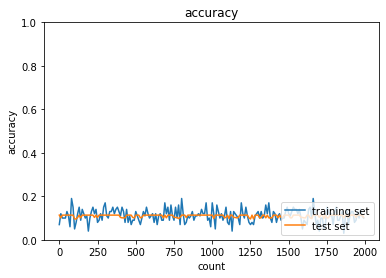

In [1]:
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
from common import layers
from collections import OrderedDict
from common import functions
from data.mnist import load_mnist
import matplotlib.pyplot as plt

# mnistをロード
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)
train_size = len(x_train)

print("データ読み込み完了")

# 重み初期値補正係数
wieght_init = 0.01
#入力層サイズ
input_layer_size = 784
#中間層サイズ
hidden_layer_1_size = 40
hidden_layer_2_size = 20

#出力層サイズ
output_layer_size = 10
# 繰り返し数
iters_num = 2000
# ミニバッチサイズ
batch_size = 100
# 学習率
learning_rate = 0.1
# 描写頻度
plot_interval=10

# 初期設定
def init_network():
    network = {} 
    network['W1'] = wieght_init * np.random.randn(input_layer_size, hidden_layer_1_size)
    network['W2'] = wieght_init * np.random.randn(hidden_layer_1_size, hidden_layer_2_size)
    network['W3'] = wieght_init * np.random.randn(hidden_layer_2_size, output_layer_size)

    network['b1'] = np.zeros(hidden_layer_1_size)
    network['b2'] = np.zeros(hidden_layer_2_size)
    network['b3'] = np.zeros(output_layer_size)

    return network

# 順伝播
def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    hidden_f = functions.sigmoid
    
    u1 =  np.dot(x, W1) + b1
    z1 = hidden_f(u1)
    u2 =  np.dot(z1, W2) + b2
    z2 = hidden_f(u2)
    u3 =  np.dot(z2, W3) + b3
    y = functions.softmax(u3)
 
    return z1, z2, y

# 誤差逆伝播
def backward(x, d, z1, z2, y):
    grad = {}
    
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    hidden_d_f = functions.d_sigmoid
    last_d_f = functions.d_softmax_with_loss
    
    
    # 出力層でのデルタ
    delta3 = last_d_f(d, y)
    # b3の勾配
    grad['b3'] = np.sum(delta3, axis=0)
    # W3の勾配
    grad['W3'] = np.dot(z2.T, delta3)
    # 2層でのデルタ
    delta2 = np.dot(delta3, W3.T) * hidden_d_f(z2)
    # b2の勾配
    grad['b2'] = np.sum(delta2, axis=0)
    # W2の勾配
    grad['W2'] = np.dot(z1.T, delta2)
    # 1層でのデルタ
    delta1 = np.dot(delta2, W2.T) * hidden_d_f(z1)
    # b1の勾配
    grad['b1'] = np.sum(delta1, axis=0)
    # W1の勾配
    grad['W1'] = np.dot(x.T, delta1)

    return grad

# パラメータの初期化
network = init_network()

accuracies_train = []
accuracies_test = []

# 正答率
def accuracy(x, d):
    z1, z2, y = forward(network, x)
    y = np.argmax(y, axis=1)
    if d.ndim != 1 : d = np.argmax(d, axis=1)
    accuracy = np.sum(y == d) / float(x.shape[0])
    return accuracy

for i in range(iters_num):
    # ランダムにバッチを取得    
    batch_mask = np.random.choice(train_size, batch_size)
    # ミニバッチに対応する教師訓練画像データを取得    
    x_batch = x_train[batch_mask]
    # ミニバッチに対応する訓練正解ラベルデータを取得する
    d_batch = d_train[batch_mask]


    
    z1, z2, y = forward(network, x_batch)
    grad = backward(x_batch, d_batch, z1, z2, y)

    if (i+1)%plot_interval==0:
        accr_test = accuracy(x_test, d_test)
        accuracies_test.append(accr_test)
        
        accr_train = accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)

        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))

    # パラメータに勾配適用
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
        network[key]  -= learning_rate * grad[key]


lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

## ReLU - gauss

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.17
                : 10. 正答率(テスト) = 0.0982
Generation: 20. 正答率(トレーニング) = 0.08
                : 20. 正答率(テスト) = 0.0982
Generation: 30. 正答率(トレーニング) = 0.14
                : 30. 正答率(テスト) = 0.1028
Generation: 40. 正答率(トレーニング) = 0.13
                : 40. 正答率(テスト) = 0.1135
Generation: 50. 正答率(トレーニング) = 0.1
                : 50. 正答率(テスト) = 0.1135
Generation: 60. 正答率(トレーニング) = 0.08
                : 60. 正答率(テスト) = 0.1135
Generation: 70. 正答率(トレーニング) = 0.12
                : 70. 正答率(テスト) = 0.1135
Generation: 80. 正答率(トレーニング) = 0.16
                : 80. 正答率(テスト) = 0.1135
Generation: 90. 正答率(トレーニング) = 0.1
                : 90. 正答率(テスト) = 0.1135
Generation: 100. 正答率(トレーニング) = 0.1
                : 100. 正答率(テスト) = 0.1135
Generation: 110. 正答率(トレーニング) = 0.06
                : 110. 正答率(テスト) = 0.1135
Generation: 120. 正答率(トレーニング) = 0.12
                : 120. 正答率(テスト) = 0.1135
Generation: 130. 正答率(トレーニング) = 0.11
                : 130. 正答率(テスト) = 0.1135
Generation

Generation: 1080. 正答率(トレーニング) = 0.82
                : 1080. 正答率(テスト) = 0.8366
Generation: 1090. 正答率(トレーニング) = 0.78
                : 1090. 正答率(テスト) = 0.8034
Generation: 1100. 正答率(トレーニング) = 0.85
                : 1100. 正答率(テスト) = 0.8434
Generation: 1110. 正答率(トレーニング) = 0.9
                : 1110. 正答率(テスト) = 0.8471
Generation: 1120. 正答率(トレーニング) = 0.81
                : 1120. 正答率(テスト) = 0.8467
Generation: 1130. 正答率(トレーニング) = 0.89
                : 1130. 正答率(テスト) = 0.8467
Generation: 1140. 正答率(トレーニング) = 0.87
                : 1140. 正答率(テスト) = 0.8433
Generation: 1150. 正答率(トレーニング) = 0.88
                : 1150. 正答率(テスト) = 0.8481
Generation: 1160. 正答率(トレーニング) = 0.81
                : 1160. 正答率(テスト) = 0.852
Generation: 1170. 正答率(トレーニング) = 0.86
                : 1170. 正答率(テスト) = 0.8494
Generation: 1180. 正答率(トレーニング) = 0.8
                : 1180. 正答率(テスト) = 0.8234
Generation: 1190. 正答率(トレーニング) = 0.91
                : 1190. 正答率(テスト) = 0.8577
Generation: 1200. 正答率(トレーニング) = 0.87
                : 

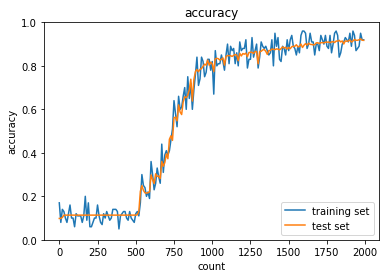

In [2]:
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
from data.mnist import load_mnist
from PIL import Image
import pickle
from common import functions
import matplotlib.pyplot as plt

# mnistをロード
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)
train_size = len(x_train)

print("データ読み込み完了")

# 重み初期値補正係数
wieght_init = 0.01
#入力層サイズ
input_layer_size = 784
#中間層サイズ
hidden_layer_1_size = 40
hidden_layer_2_size = 20

#出力層サイズ
output_layer_size = 10
# 繰り返し数
iters_num = 2000
# ミニバッチサイズ
batch_size = 100
# 学習率
learning_rate = 0.1
# 描写頻度
plot_interval=10

# 初期設定
def init_network():
    network = {} 

    network['W1'] = wieght_init * np.random.randn(input_layer_size, hidden_layer_1_size)
    network['W2'] = wieght_init * np.random.randn(hidden_layer_1_size, hidden_layer_2_size)
    network['W3'] = wieght_init * np.random.randn(hidden_layer_2_size, output_layer_size)
            
    network['b1'] = np.zeros(hidden_layer_1_size)
    network['b2'] = np.zeros(hidden_layer_2_size)
    network['b3'] = np.zeros(output_layer_size)

    return network

# 順伝播
def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    ###########  変更箇所  ##############

    hidden_f = functions.relu

    #################################
    
    u1 =  np.dot(x, W1) + b1
    z1 = hidden_f(u1)
    u2 =  np.dot(z1, W2) + b2
    z2 = hidden_f(u2)
    u3 =  np.dot(z2, W3) + b3
    y = functions.softmax(u3)
 
    return z1, z2, y

# 誤差逆伝播
def backward(x, d, z1, z2, y):
    grad = {}
    
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    ###########  変更箇所  ##############
    
    hidden_d_f = functions.d_relu
    
    #################################
    
    
    # 出力層でのデルタ
    delta3 = functions.d_softmax_with_loss(d, y)
    # b3の勾配
    grad['b3'] = np.sum(delta3, axis=0)
    # W3の勾配
    grad['W3'] = np.dot(z2.T, delta3)
    # 2層でのデルタ
    delta2 = np.dot(delta3, W3.T) * hidden_d_f(z2)
    # b2の勾配
    grad['b2'] = np.sum(delta2, axis=0)
    # W2の勾配
    grad['W2'] = np.dot(z1.T, delta2)
    # 1層でのデルタ
    delta1 = np.dot(delta2, W2.T) * hidden_d_f(z1)
    # b1の勾配
    grad['b1'] = np.sum(delta1, axis=0)
    # W1の勾配
    grad['W1'] = np.dot(x.T, delta1)

    return grad

# パラメータの初期化
network = init_network()

accuracies_train = []
accuracies_test = []

# 正答率
def accuracy(x, d):
    z1, z2, y = forward(network, x)
    y = np.argmax(y, axis=1)
    if d.ndim != 1 : d = np.argmax(d, axis=1)
    accuracy = np.sum(y == d) / float(x.shape[0])
    return accuracy

for i in range(iters_num):
    # ランダムにバッチを取得    
    batch_mask = np.random.choice(train_size, batch_size)
    # ミニバッチに対応する教師訓練画像データを取得    
    x_batch = x_train[batch_mask]
    # ミニバッチに対応する訓練正解ラベルデータを取得する
    d_batch = d_train[batch_mask]


    
    z1, z2, y = forward(network, x_batch)
    grad = backward(x_batch, d_batch, z1, z2, y)

    if (i+1)%plot_interval==0:
        accr_test = accuracy(x_test, d_test)
        accuracies_test.append(accr_test)
        
        accr_train = accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)

        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))
        
    # パラメータに勾配適用
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
        network[key]  -= learning_rate * grad[key]


lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

## sigmoid - Xavier

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.16
                : 10. 正答率(テスト) = 0.1048
Generation: 20. 正答率(トレーニング) = 0.11
                : 20. 正答率(テスト) = 0.1135
Generation: 30. 正答率(トレーニング) = 0.09
                : 30. 正答率(テスト) = 0.1135
Generation: 40. 正答率(トレーニング) = 0.18
                : 40. 正答率(テスト) = 0.1451
Generation: 50. 正答率(トレーニング) = 0.16
                : 50. 正答率(テスト) = 0.1135
Generation: 60. 正答率(トレーニング) = 0.06
                : 60. 正答率(テスト) = 0.1135
Generation: 70. 正答率(トレーニング) = 0.14
                : 70. 正答率(テスト) = 0.1508
Generation: 80. 正答率(トレーニング) = 0.23
                : 80. 正答率(テスト) = 0.207
Generation: 90. 正答率(トレーニング) = 0.22
                : 90. 正答率(テスト) = 0.1818
Generation: 100. 正答率(トレーニング) = 0.22
                : 100. 正答率(テスト) = 0.2326
Generation: 110. 正答率(トレーニング) = 0.17
                : 110. 正答率(テスト) = 0.1377
Generation: 120. 正答率(トレーニング) = 0.11
                : 120. 正答率(テスト) = 0.1135
Generation: 130. 正答率(トレーニング) = 0.13
                : 130. 正答率(テスト) = 0.1198
Generati

Generation: 1100. 正答率(トレーニング) = 0.73
                : 1100. 正答率(テスト) = 0.7255
Generation: 1110. 正答率(トレーニング) = 0.75
                : 1110. 正答率(テスト) = 0.7203
Generation: 1120. 正答率(トレーニング) = 0.76
                : 1120. 正答率(テスト) = 0.7291
Generation: 1130. 正答率(トレーニング) = 0.76
                : 1130. 正答率(テスト) = 0.7171
Generation: 1140. 正答率(トレーニング) = 0.77
                : 1140. 正答率(テスト) = 0.7317
Generation: 1150. 正答率(トレーニング) = 0.68
                : 1150. 正答率(テスト) = 0.7345
Generation: 1160. 正答率(トレーニング) = 0.71
                : 1160. 正答率(テスト) = 0.7345
Generation: 1170. 正答率(トレーニング) = 0.7
                : 1170. 正答率(テスト) = 0.7347
Generation: 1180. 正答率(トレーニング) = 0.73
                : 1180. 正答率(テスト) = 0.7377
Generation: 1190. 正答率(トレーニング) = 0.75
                : 1190. 正答率(テスト) = 0.7413
Generation: 1200. 正答率(トレーニング) = 0.74
                : 1200. 正答率(テスト) = 0.7409
Generation: 1210. 正答率(トレーニング) = 0.73
                : 1210. 正答率(テスト) = 0.745
Generation: 1220. 正答率(トレーニング) = 0.75
                :

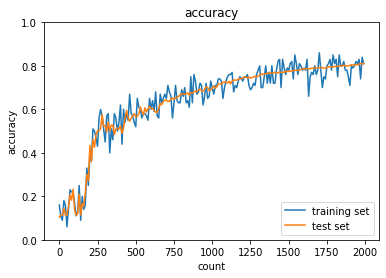

In [3]:
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
from data.mnist import load_mnist
from PIL import Image
import pickle
from common import functions
import matplotlib.pyplot as plt

# mnistをロード
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)
train_size = len(x_train)

print("データ読み込み完了")

#入力層サイズ
input_layer_size = 784
#中間層サイズ
hidden_layer_1_size = 40
hidden_layer_2_size = 20
#出力層サイズ
output_layer_size = 10
# 繰り返し数
iters_num = 2000
# ミニバッチサイズ
batch_size = 100
# 学習率
learning_rate = 0.1
# 描写頻度
plot_interval=10

# 初期設定
def init_network():
    network = {} 
    
    ###########  変更箇所  ##############
    
    # Xavierの初期値
    network['W1'] = np.random.randn(input_layer_size, hidden_layer_1_size) / (np.sqrt(input_layer_size))
    network['W2'] = np.random.randn(hidden_layer_1_size, hidden_layer_2_size) / (np.sqrt(hidden_layer_1_size))
    network['W3'] = np.random.randn(hidden_layer_2_size, output_layer_size) / (np.sqrt(hidden_layer_2_size))
    
    #################################
    
    network['b1'] = np.zeros(hidden_layer_1_size)
    network['b2'] = np.zeros(hidden_layer_2_size)
    network['b3'] = np.zeros(output_layer_size)

    return network

# 順伝播
def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    hidden_f = functions.sigmoid
    
    u1 =  np.dot(x, W1) + b1
    z1 = hidden_f(u1)
    u2 =  np.dot(z1, W2) + b2
    z2 = hidden_f(u2)
    u3 =  np.dot(z2, W3) + b3
    y = functions.softmax(u3)
 
    return z1, z2, y

# 誤差逆伝播
def backward(x, d, z1, z2, y):
    grad = {}
    
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    hidden_d_f = functions.d_sigmoid
    
    # 出力層でのデルタ
    delta3 = functions.d_softmax_with_loss(d, y)
    # b3の勾配
    grad['b3'] = np.sum(delta3, axis=0)
    # W3の勾配
    grad['W3'] = np.dot(z2.T, delta3)
    # 2層でのデルタ
    delta2 = np.dot(delta3, W3.T) * hidden_d_f(z2)
    # b2の勾配
    grad['b2'] = np.sum(delta2, axis=0)
    # W2の勾配
    grad['W2'] = np.dot(z1.T, delta2)
    # 1層でのデルタ
    delta1 = np.dot(delta2, W2.T) * hidden_d_f(z1)
    # b1の勾配
    grad['b1'] = np.sum(delta1, axis=0)
    # W1の勾配
    grad['W1'] = np.dot(x.T, delta1)

    return grad

# パラメータの初期化
network = init_network()

accuracies_train = []
accuracies_test = []

# 正答率
def accuracy(x, d):
    z1, z2, y = forward(network, x)
    y = np.argmax(y, axis=1)
    if d.ndim != 1 : d = np.argmax(d, axis=1)
    accuracy = np.sum(y == d) / float(x.shape[0])
    return accuracy

for i in range(iters_num):
    # ランダムにバッチを取得    
    batch_mask = np.random.choice(train_size, batch_size)
    # ミニバッチに対応する教師訓練画像データを取得    
    x_batch = x_train[batch_mask]
    # ミニバッチに対応する訓練正解ラベルデータを取得する
    d_batch = d_train[batch_mask]


    
    z1, z2, y = forward(network, x_batch)
    grad = backward(x_batch, d_batch, z1, z2, y)

    if (i+1)%plot_interval==0:
        accr_test = accuracy(x_test, d_test)
        accuracies_test.append(accr_test)
        
        accr_train = accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)

        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))
        
    # パラメータに勾配適用
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
        network[key]  -= learning_rate * grad[key]


lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

## ReLU - He

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.46
                : 10. 正答率(テスト) = 0.4263
Generation: 20. 正答率(トレーニング) = 0.54
                : 20. 正答率(テスト) = 0.596
Generation: 30. 正答率(トレーニング) = 0.66
                : 30. 正答率(テスト) = 0.6573
Generation: 40. 正答率(トレーニング) = 0.77
                : 40. 正答率(テスト) = 0.7687
Generation: 50. 正答率(トレーニング) = 0.82
                : 50. 正答率(テスト) = 0.8044
Generation: 60. 正答率(トレーニング) = 0.8
                : 60. 正答率(テスト) = 0.7632
Generation: 70. 正答率(トレーニング) = 0.81
                : 70. 正答率(テスト) = 0.8292
Generation: 80. 正答率(トレーニング) = 0.83
                : 80. 正答率(テスト) = 0.805
Generation: 90. 正答率(トレーニング) = 0.8
                : 90. 正答率(テスト) = 0.8304
Generation: 100. 正答率(トレーニング) = 0.73
                : 100. 正答率(テスト) = 0.7749
Generation: 110. 正答率(トレーニング) = 0.89
                : 110. 正答率(テスト) = 0.859
Generation: 120. 正答率(トレーニング) = 0.86
                : 120. 正答率(テスト) = 0.8646
Generation: 130. 正答率(トレーニング) = 0.89
                : 130. 正答率(テスト) = 0.8722
Generation: 

Generation: 1100. 正答率(トレーニング) = 0.96
                : 1100. 正答率(テスト) = 0.9424
Generation: 1110. 正答率(トレーニング) = 0.95
                : 1110. 正答率(テスト) = 0.9399
Generation: 1120. 正答率(トレーニング) = 0.96
                : 1120. 正答率(テスト) = 0.9381
Generation: 1130. 正答率(トレーニング) = 0.96
                : 1130. 正答率(テスト) = 0.9386
Generation: 1140. 正答率(トレーニング) = 0.96
                : 1140. 正答率(テスト) = 0.944
Generation: 1150. 正答率(トレーニング) = 0.91
                : 1150. 正答率(テスト) = 0.9437
Generation: 1160. 正答率(トレーニング) = 0.96
                : 1160. 正答率(テスト) = 0.9456
Generation: 1170. 正答率(トレーニング) = 0.9
                : 1170. 正答率(テスト) = 0.9448
Generation: 1180. 正答率(トレーニング) = 0.97
                : 1180. 正答率(テスト) = 0.9451
Generation: 1190. 正答率(トレーニング) = 0.94
                : 1190. 正答率(テスト) = 0.9436
Generation: 1200. 正答率(トレーニング) = 0.96
                : 1200. 正答率(テスト) = 0.9467
Generation: 1210. 正答率(トレーニング) = 0.92
                : 1210. 正答率(テスト) = 0.9417
Generation: 1220. 正答率(トレーニング) = 0.9
                : 

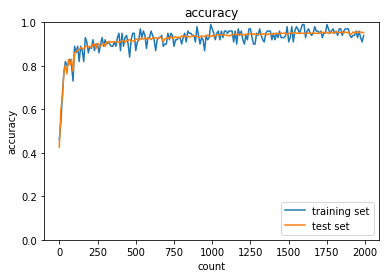

In [4]:
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
from data.mnist import load_mnist
from PIL import Image
import pickle
from common import functions
import matplotlib.pyplot as plt

# mnistをロード
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)
train_size = len(x_train)

print("データ読み込み完了")

# 重み初期値補正係数
wieght_init = 0.01
#入力層サイズ
input_layer_size = 784
#中間層サイズ
hidden_layer_1_size = 40
hidden_layer_2_size = 20

#出力層サイズ
output_layer_size = 10
# 繰り返し数
iters_num = 2000
# ミニバッチサイズ
batch_size = 100
# 学習率
learning_rate = 0.1
# 描写頻度
plot_interval=10

# 初期設定
def init_network():
    network = {} 

    ###########  変更箇所  ##############

    # Heの初期値
    network['W1'] = np.random.randn(input_layer_size, hidden_layer_1_size) / np.sqrt(input_layer_size) * np.sqrt(2)
    network['W2'] = np.random.randn(hidden_layer_1_size, hidden_layer_2_size) / np.sqrt(hidden_layer_1_size) * np.sqrt(2)
    network['W3'] = np.random.randn(hidden_layer_2_size, output_layer_size) / np.sqrt(hidden_layer_2_size) * np.sqrt(2)
        
    #################################
    
    network['b1'] = np.zeros(hidden_layer_1_size)
    network['b2'] = np.zeros(hidden_layer_2_size)
    network['b3'] = np.zeros(output_layer_size)

    return network

# 順伝播
def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    ###########  変更箇所  ##############
    
    hidden_f = functions.relu
    
    #################################
    
    u1 =  np.dot(x, W1) + b1
    z1 = hidden_f(u1)
    u2 =  np.dot(z1, W2) + b2
    z2 = hidden_f(u2)
    u3 =  np.dot(z2, W3) + b3
    y = functions.softmax(u3)
 
    return z1, z2, y

# 誤差逆伝播
def backward(x, d, z1, z2, y):
    grad = {}
    
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    ###########  変更箇所  ##############
    
    hidden_d_f = functions.d_relu
    
    #################################
    
    # 出力層でのデルタ
    delta3 = functions.d_softmax_with_loss(d, y)
    # b3の勾配
    grad['b3'] = np.sum(delta3, axis=0)
    # W3の勾配
    grad['W3'] = np.dot(z2.T, delta3)
    # 2層でのデルタ
    delta2 = np.dot(delta3, W3.T) * hidden_d_f(z2)
    # b2の勾配
    grad['b2'] = np.sum(delta2, axis=0)
    # W2の勾配
    grad['W2'] = np.dot(z1.T, delta2)
    # 1層でのデルタ
    delta1 = np.dot(delta2, W2.T) * hidden_d_f(z1)
    # b1の勾配
    grad['b1'] = np.sum(delta1, axis=0)
    # W1の勾配
    grad['W1'] = np.dot(x.T, delta1)

    return grad

# パラメータの初期化
network = init_network()

accuracies_train = []
accuracies_test = []

# 正答率
def accuracy(x, d):
    z1, z2, y = forward(network, x)
    y = np.argmax(y, axis=1)
    if d.ndim != 1 : d = np.argmax(d, axis=1)
    accuracy = np.sum(y == d) / float(x.shape[0])
    return accuracy

for i in range(iters_num):
    # ランダムにバッチを取得    
    batch_mask = np.random.choice(train_size, batch_size)
    # ミニバッチに対応する教師訓練画像データを取得    
    x_batch = x_train[batch_mask]
    # ミニバッチに対応する訓練正解ラベルデータを取得する
    d_batch = d_train[batch_mask]


    
    z1, z2, y = forward(network, x_batch)
    grad = backward(x_batch, d_batch, z1, z2, y)

    if (i+1)%plot_interval==0:
        accr_test = accuracy(x_test, d_test)
        accuracies_test.append(accr_test)
        
        accr_train = accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)

        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))
        
    # パラメータに勾配適用
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
        network[key]  -= learning_rate * grad[key]


lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

## 隠れ層のノード数を変更

Generation: 10. 正答率(トレーニング) = 0.08
                : 10. 正答率(テスト) = 0.101
Generation: 20. 正答率(トレーニング) = 0.13
                : 20. 正答率(テスト) = 0.1009
Generation: 30. 正答率(トレーニング) = 0.08
                : 30. 正答率(テスト) = 0.0958
Generation: 40. 正答率(トレーニング) = 0.06
                : 40. 正答率(テスト) = 0.1028
Generation: 50. 正答率(トレーニング) = 0.13
                : 50. 正答率(テスト) = 0.098
Generation: 60. 正答率(トレーニング) = 0.08
                : 60. 正答率(テスト) = 0.0958
Generation: 70. 正答率(トレーニング) = 0.15
                : 70. 正答率(テスト) = 0.1135
Generation: 80. 正答率(トレーニング) = 0.11
                : 80. 正答率(テスト) = 0.1135
Generation: 90. 正答率(トレーニング) = 0.13
                : 90. 正答率(テスト) = 0.101
Generation: 100. 正答率(トレーニング) = 0.09
                : 100. 正答率(テスト) = 0.1135
Generation: 110. 正答率(トレーニング) = 0.1
                : 110. 正答率(テスト) = 0.0974
Generation: 120. 正答率(トレーニング) = 0.09
                : 120. 正答率(テスト) = 0.101
Generation: 130. 正答率(トレーニング) = 0.07
                : 130. 正答率(テスト) = 0.0974
Generation: 140. 正答率(ト

Generation: 1080. 正答率(トレーニング) = 0.12
                : 1080. 正答率(テスト) = 0.1028
Generation: 1090. 正答率(トレーニング) = 0.06
                : 1090. 正答率(テスト) = 0.1009
Generation: 1100. 正答率(トレーニング) = 0.12
                : 1100. 正答率(テスト) = 0.098
Generation: 1110. 正答率(トレーニング) = 0.11
                : 1110. 正答率(テスト) = 0.1028
Generation: 1120. 正答率(トレーニング) = 0.09
                : 1120. 正答率(テスト) = 0.101
Generation: 1130. 正答率(トレーニング) = 0.09
                : 1130. 正答率(テスト) = 0.1028
Generation: 1140. 正答率(トレーニング) = 0.14
                : 1140. 正答率(テスト) = 0.1135
Generation: 1150. 正答率(トレーニング) = 0.13
                : 1150. 正答率(テスト) = 0.1135
Generation: 1160. 正答率(トレーニング) = 0.13
                : 1160. 正答率(テスト) = 0.1135
Generation: 1170. 正答率(トレーニング) = 0.1
                : 1170. 正答率(テスト) = 0.1135
Generation: 1180. 正答率(トレーニング) = 0.09
                : 1180. 正答率(テスト) = 0.1023
Generation: 1190. 正答率(トレーニング) = 0.11
                : 1190. 正答率(テスト) = 0.0958
Generation: 1200. 正答率(トレーニング) = 0.12
                : 

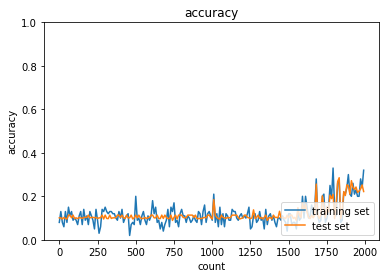

In [5]:
# 重み初期値補正係数
wieght_init = 0.01
#入力層サイズ
input_layer_size = 784
#中間層サイズ
#hidden_layer_1_size = 40
#hidden_layer_2_size = 20

hidden_layer_1_size = 400
hidden_layer_2_size = 200

#出力層サイズ
output_layer_size = 10
# 繰り返し数
iters_num = 2000
# ミニバッチサイズ
batch_size = 100
# 学習率
learning_rate = 0.1
# 描写頻度
plot_interval=10

# 初期設定
def init_network():
    network = {} 
    network['W1'] = wieght_init * np.random.randn(input_layer_size, hidden_layer_1_size)
    network['W2'] = wieght_init * np.random.randn(hidden_layer_1_size, hidden_layer_2_size)
    network['W3'] = wieght_init * np.random.randn(hidden_layer_2_size, output_layer_size)

    network['b1'] = np.zeros(hidden_layer_1_size)
    network['b2'] = np.zeros(hidden_layer_2_size)
    network['b3'] = np.zeros(output_layer_size)

    return network

# 順伝播
def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    hidden_f = functions.sigmoid
    
    u1 =  np.dot(x, W1) + b1
    z1 = hidden_f(u1)
    u2 =  np.dot(z1, W2) + b2
    z2 = hidden_f(u2)
    u3 =  np.dot(z2, W3) + b3
    y = functions.softmax(u3)
 
    return z1, z2, y

# 誤差逆伝播
def backward(x, d, z1, z2, y):
    grad = {}
    
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    hidden_d_f = functions.d_sigmoid
    last_d_f = functions.d_softmax_with_loss
    
    
    # 出力層でのデルタ
    delta3 = last_d_f(d, y)
    # b3の勾配
    grad['b3'] = np.sum(delta3, axis=0)
    # W3の勾配
    grad['W3'] = np.dot(z2.T, delta3)
    # 2層でのデルタ
    delta2 = np.dot(delta3, W3.T) * hidden_d_f(z2)
    # b2の勾配
    grad['b2'] = np.sum(delta2, axis=0)
    # W2の勾配
    grad['W2'] = np.dot(z1.T, delta2)
    # 1層でのデルタ
    delta1 = np.dot(delta2, W2.T) * hidden_d_f(z1)
    # b1の勾配
    grad['b1'] = np.sum(delta1, axis=0)
    # W1の勾配
    grad['W1'] = np.dot(x.T, delta1)

    return grad

# パラメータの初期化
network = init_network()

accuracies_train = []
accuracies_test = []

# 正答率
def accuracy(x, d):
    z1, z2, y = forward(network, x)
    y = np.argmax(y, axis=1)
    if d.ndim != 1 : d = np.argmax(d, axis=1)
    accuracy = np.sum(y == d) / float(x.shape[0])
    return accuracy

for i in range(iters_num):
    # ランダムにバッチを取得    
    batch_mask = np.random.choice(train_size, batch_size)
    # ミニバッチに対応する教師訓練画像データを取得    
    x_batch = x_train[batch_mask]
    # ミニバッチに対応する訓練正解ラベルデータを取得する
    d_batch = d_train[batch_mask]


    
    z1, z2, y = forward(network, x_batch)
    grad = backward(x_batch, d_batch, z1, z2, y)

    if (i+1)%plot_interval==0:
        accr_test = accuracy(x_test, d_test)
        accuracies_test.append(accr_test)
        
        accr_train = accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)

        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))

    # パラメータに勾配適用
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
        network[key]  -= learning_rate * grad[key]


lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

## sigmoid - He

In [12]:
# 重み初期値補正係数
wieght_init = 0.01
#入力層サイズ
input_layer_size = 784
#中間層サイズ
hidden_layer_1_size = 40
hidden_layer_2_size = 20

#出力層サイズ
output_layer_size = 10
# 繰り返し数
iters_num = 2000
# ミニバッチサイズ
batch_size = 100
# 学習率
learning_rate = 0.1
# 描写頻度
plot_interval=10

In [13]:
def init_network_He():
    network = {} 

    ###########  変更箇所  ##############

    # Heの初期値
    network['W1'] = np.random.randn(input_layer_size, hidden_layer_1_size) / np.sqrt(input_layer_size) * np.sqrt(2)
    network['W2'] = np.random.randn(hidden_layer_1_size, hidden_layer_2_size) / np.sqrt(hidden_layer_1_size) * np.sqrt(2)
    network['W3'] = np.random.randn(hidden_layer_2_size, output_layer_size) / np.sqrt(hidden_layer_2_size) * np.sqrt(2)
        
    #################################
    
    network['b1'] = np.zeros(hidden_layer_1_size)
    network['b2'] = np.zeros(hidden_layer_2_size)
    network['b3'] = np.zeros(output_layer_size)

    return network

In [14]:
def forward_Sigmoid(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    hidden_f = functions.sigmoid
    
    u1 =  np.dot(x, W1) + b1
    z1 = hidden_f(u1)
    u2 =  np.dot(z1, W2) + b2
    z2 = hidden_f(u2)
    u3 =  np.dot(z2, W3) + b3
    y = functions.softmax(u3)
 
    return z1, z2, y

Generation: 10. 正答率(トレーニング) = 0.12
                : 10. 正答率(テスト) = 0.0982
Generation: 20. 正答率(トレーニング) = 0.08
                : 20. 正答率(テスト) = 0.0991
Generation: 30. 正答率(トレーニング) = 0.14
                : 30. 正答率(テスト) = 0.1942
Generation: 40. 正答率(トレーニング) = 0.34
                : 40. 正答率(テスト) = 0.3132
Generation: 50. 正答率(トレーニング) = 0.44
                : 50. 正答率(テスト) = 0.3214
Generation: 60. 正答率(トレーニング) = 0.26
                : 60. 正答率(テスト) = 0.3019
Generation: 70. 正答率(トレーニング) = 0.44
                : 70. 正答率(テスト) = 0.373
Generation: 80. 正答率(トレーニング) = 0.39
                : 80. 正答率(テスト) = 0.3511
Generation: 90. 正答率(トレーニング) = 0.34
                : 90. 正答率(テスト) = 0.3762
Generation: 100. 正答率(トレーニング) = 0.39
                : 100. 正答率(テスト) = 0.3325
Generation: 110. 正答率(トレーニング) = 0.34
                : 110. 正答率(テスト) = 0.4096
Generation: 120. 正答率(トレーニング) = 0.44
                : 120. 正答率(テスト) = 0.4942
Generation: 130. 正答率(トレーニング) = 0.49
                : 130. 正答率(テスト) = 0.5094
Generation: 140. 正

Generation: 1090. 正答率(トレーニング) = 0.82
                : 1090. 正答率(テスト) = 0.7892
Generation: 1100. 正答率(トレーニング) = 0.78
                : 1100. 正答率(テスト) = 0.7883
Generation: 1110. 正答率(トレーニング) = 0.75
                : 1110. 正答率(テスト) = 0.7924
Generation: 1120. 正答率(トレーニング) = 0.78
                : 1120. 正答率(テスト) = 0.7957
Generation: 1130. 正答率(トレーニング) = 0.76
                : 1130. 正答率(テスト) = 0.7931
Generation: 1140. 正答率(トレーニング) = 0.77
                : 1140. 正答率(テスト) = 0.7966
Generation: 1150. 正答率(トレーニング) = 0.79
                : 1150. 正答率(テスト) = 0.796
Generation: 1160. 正答率(トレーニング) = 0.8
                : 1160. 正答率(テスト) = 0.8004
Generation: 1170. 正答率(トレーニング) = 0.75
                : 1170. 正答率(テスト) = 0.7967
Generation: 1180. 正答率(トレーニング) = 0.83
                : 1180. 正答率(テスト) = 0.7977
Generation: 1190. 正答率(トレーニング) = 0.82
                : 1190. 正答率(テスト) = 0.8002
Generation: 1200. 正答率(トレーニング) = 0.79
                : 1200. 正答率(テスト) = 0.8028
Generation: 1210. 正答率(トレーニング) = 0.77
                :

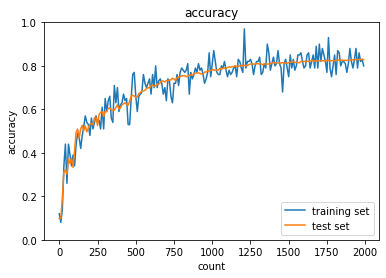

In [15]:
# パラメータの初期化
network = init_network_He()

accuracies_train = []
accuracies_test = []

for i in range(iters_num):
    # ランダムにバッチを取得    
    batch_mask = np.random.choice(train_size, batch_size)
    # ミニバッチに対応する教師訓練画像データを取得    
    x_batch = x_train[batch_mask]
    # ミニバッチに対応する訓練正解ラベルデータを取得する
    d_batch = d_train[batch_mask]


    
    z1, z2, y = forward_Sigmoid(network, x_batch)
    grad = backward(x_batch, d_batch, z1, z2, y)

    if (i+1)%plot_interval==0:
        accr_test = accuracy(x_test, d_test)
        accuracies_test.append(accr_test)
        
        accr_train = accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)

        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))

    # パラメータに勾配適用
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
        network[key]  -= learning_rate * grad[key]


lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

## relu - Xavier 

In [16]:
# 初期設定
def init_network_Xavier():
    network = {} 
    
    ###########  変更箇所  ##############
    
    # Xavierの初期値
    network['W1'] = np.random.randn(input_layer_size, hidden_layer_1_size) / (np.sqrt(input_layer_size))
    network['W2'] = np.random.randn(hidden_layer_1_size, hidden_layer_2_size) / (np.sqrt(hidden_layer_1_size))
    network['W3'] = np.random.randn(hidden_layer_2_size, output_layer_size) / (np.sqrt(hidden_layer_2_size))
    
    #################################
    
    network['b1'] = np.zeros(hidden_layer_1_size)
    network['b2'] = np.zeros(hidden_layer_2_size)
    network['b3'] = np.zeros(output_layer_size)

    return network

In [17]:
# 順伝播
def forward_ReLU(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    ###########  変更箇所  ##############

    hidden_f = functions.relu

    #################################
    
    u1 =  np.dot(x, W1) + b1
    z1 = hidden_f(u1)
    u2 =  np.dot(z1, W2) + b2
    z2 = hidden_f(u2)
    u3 =  np.dot(z2, W3) + b3
    y = functions.softmax(u3)
 
    return z1, z2, y

Generation: 10. 正答率(トレーニング) = 0.09
                : 10. 正答率(テスト) = 0.1028
Generation: 20. 正答率(トレーニング) = 0.14
                : 20. 正答率(テスト) = 0.1028
Generation: 30. 正答率(トレーニング) = 0.11
                : 30. 正答率(テスト) = 0.1028
Generation: 40. 正答率(トレーニング) = 0.08
                : 40. 正答率(テスト) = 0.1028
Generation: 50. 正答率(トレーニング) = 0.13
                : 50. 正答率(テスト) = 0.1028
Generation: 60. 正答率(トレーニング) = 0.13
                : 60. 正答率(テスト) = 0.1028
Generation: 70. 正答率(トレーニング) = 0.13
                : 70. 正答率(テスト) = 0.1028
Generation: 80. 正答率(トレーニング) = 0.11
                : 80. 正答率(テスト) = 0.1028
Generation: 90. 正答率(トレーニング) = 0.08
                : 90. 正答率(テスト) = 0.1109
Generation: 100. 正答率(トレーニング) = 0.15
                : 100. 正答率(テスト) = 0.15
Generation: 110. 正答率(トレーニング) = 0.15
                : 110. 正答率(テスト) = 0.1783
Generation: 120. 正答率(トレーニング) = 0.14
                : 120. 正答率(テスト) = 0.1943
Generation: 130. 正答率(トレーニング) = 0.19
                : 130. 正答率(テスト) = 0.1932
Generation: 140. 正答

Generation: 1080. 正答率(トレーニング) = 0.47
                : 1080. 正答率(テスト) = 0.4855
Generation: 1090. 正答率(トレーニング) = 0.45
                : 1090. 正答率(テスト) = 0.4671
Generation: 1100. 正答率(トレーニング) = 0.54
                : 1100. 正答率(テスト) = 0.4679
Generation: 1110. 正答率(トレーニング) = 0.53
                : 1110. 正答率(テスト) = 0.4471
Generation: 1120. 正答率(トレーニング) = 0.53
                : 1120. 正答率(テスト) = 0.47
Generation: 1130. 正答率(トレーニング) = 0.45
                : 1130. 正答率(テスト) = 0.472
Generation: 1140. 正答率(トレーニング) = 0.42
                : 1140. 正答率(テスト) = 0.4784
Generation: 1150. 正答率(トレーニング) = 0.41
                : 1150. 正答率(テスト) = 0.4764
Generation: 1160. 正答率(トレーニング) = 0.49
                : 1160. 正答率(テスト) = 0.485
Generation: 1170. 正答率(トレーニング) = 0.5
                : 1170. 正答率(テスト) = 0.4737
Generation: 1180. 正答率(トレーニング) = 0.46
                : 1180. 正答率(テスト) = 0.4853
Generation: 1190. 正答率(トレーニング) = 0.47
                : 1190. 正答率(テスト) = 0.4766
Generation: 1200. 正答率(トレーニング) = 0.48
                : 12

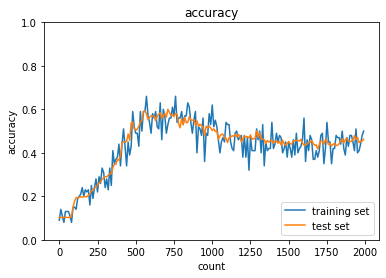

In [18]:
# パラメータの初期化
network = init_network_Xavier()

accuracies_train = []
accuracies_test = []

for i in range(iters_num):
    # ランダムにバッチを取得    
    batch_mask = np.random.choice(train_size, batch_size)
    # ミニバッチに対応する教師訓練画像データを取得    
    x_batch = x_train[batch_mask]
    # ミニバッチに対応する訓練正解ラベルデータを取得する
    d_batch = d_train[batch_mask]


    
    z1, z2, y = forward_ReLU(network, x_batch)
    grad = backward(x_batch, d_batch, z1, z2, y)

    if (i+1)%plot_interval==0:
        accr_test = accuracy(x_test, d_test)
        accuracies_test.append(accr_test)
        
        accr_train = accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)

        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))

    # パラメータに勾配適用
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
        network[key]  -= learning_rate * grad[key]


lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

# 考察
各種活性化関数とネットワーク初期化方法の組み合わせ、および隠れ層ノード数変化による、トレーニング結果の違いを確認できた。

今回のデータセットでは、ReLU + Heが最もよい結果にみえる。また、sigmoid + Xavierの組み合わせも、トレーニング回数とaccuracyの変化から、実用的な組み合わせであることを示唆している。これは、かきの情報とも相即している。

参考情報：
- [Xavierの初期値とは](https://qiita.com/Becon147/items/a9971041bca5c10483bc)
>Xavierの初期値は、主にシグモイド関数等を活性化関数として用いた時に効果を発揮する初期値である。

- [ニューラルネットワークの重みの初期値について解説](https://ai-trend.jp/basic-study/neural-network/initial_value/#:~:text=He%E3%81%AE%E5%88%9D%E6%9C%9F%E5%80%A4%E3%81%AF,%E9%87%8D%E3%81%BF%E3%82%92%E8%A8%AD%E5%AE%9A%E3%81%97%E3%81%BE%E3%81%99%E3%80%82)
>ニューラルネットワークの活性化関数がReLU関数の時はHeの初期値を用いて、それ以外の時はXivierの初期値を用いるとよいでしょう。